# Monday, April 14th

## A little more about dictionaries

We've seen some example of where dictionaries are a useful structure. Let's talk a little more about defining dictionaries:

One way is to create an empty dictionary (using `{}`) and add elements to that dictionary.

In [1]:
my_dict = {}

my_dict['a'] = 'Hello'0
my_dict[1] = 'I go with 1.'
my_dict['Hello'] = 'Goodbye'

In [2]:
my_dict

{'a': 'Hello', 1: 'I go with 1.', 'Hello': 'Goodbye'}

We can also define a dictionary with a comma separated list of `<key>:<value>` pairs:

In [3]:
my_dict = {'a':'Hello', 1:'I go with 1.', 'Hello':'Goodbye'}

In [4]:
my_dict

{'a': 'Hello', 1: 'I go with 1.', 'Hello': 'Goodbye'}

We can also use syntax similar to list comprehension to define dictionaries:

In [5]:
my_dict = {letter:number for number, letter in enumerate('abcde')}

In [6]:
my_dict

{'a': 0, 'b': 1, 'c': 2, 'd': 3, 'e': 4}

Once we have a dictionary, there are times when we may want to access just the keys, just the values, or the key/value pairs.

 - We can use the `.keys()` method to get a "list" of the keys. 
 - We can use the `.values()` method to get a "list" of the values.
 - We can use the `.items()` method to get a "list" of key/value pairs.

In [10]:
for key in my_dict.keys():
    print(key)

a
b
c
d
e


In [15]:
for value in my_dict.values():
    print(value)

0
1
2
3
4


In [16]:
for item in my_dict.items():
    print(item)

('a', 0)
('b', 1)
('c', 2)
('d', 3)
('e', 4)


In [17]:
for key, value in my_dict.items():
    print(key, value)

a 0
b 1
c 2
d 3
e 4


## More about function arguments and dictionaries

Recall: We can define functions to take in a specified number of positional arguments and some optional default arguments.

In [18]:
def f(a,b,c,d=7,e=8):
    return a+b+c+d+e

In [19]:
f(1,2,3)

21

In [20]:
f(1,2,3,4)

18

In [21]:
f(1,2,3,e=4)

17

Sometimes, it's helpful to be able to write functions where we don't know how many inputs it will accept, and/or we don't know what kinds of keyword arguments will be supplied.

For example, the `max` function can take in a comma separated list of values and will return the largest.

In [22]:
help(max)

Help on built-in function max in module builtins:

max(...)
    max(iterable, *[, default=obj, key=func]) -> value
    max(arg1, arg2, *args, *[, key=func]) -> value
    
    With a single iterable argument, return its biggest item. The
    default keyword-only argument specifies an object to return if
    the provided iterable is empty.
    With two or more arguments, return the largest argument.



In [24]:
max(1,2,3,4,5,6,7,8,9,10,11,12)

12

To do this, we can use an `*` when defining a function to collect any unaccounted-for positional arguments:

In [25]:
def f(a,b,*args):
    print(a,b)
    print(args)

In [26]:
f(1,2)

1 2
()


In [27]:
f(1,2,3,4,5)

1 2
(3, 4, 5)


In [28]:
def my_sum(*args):
    return sum(args)

In [30]:
my_sum(1,2,3,4)

10

In [31]:
def product(*args):
    prod = 1
    for arg in args:
        prod *= arg
    return prod

In [33]:
product(1,2,3,6,7)

252

We can also use an `*` to unpack a list as positional arguments for a function:

In [41]:
product(*[1,2,3,4])

24

## Dictionaries and keyword arguments

Suppose we have a function that takes in some input variables `a`, `b`, `c`, `d`. Suppose we also have a dictionary with keys `'a'`, `'b'`, `'c'`, and `'d'`.

In [34]:
def f(a,b,c,d):
    return a + b + c + d

In [35]:
my_dict = {'a':'Hello', 'b': ' ', 'c':'Goodbye', 'd':'!'}

We can use the dictionary to define keyword arguments to plug into our function using `**`:

In [36]:
f(**my_dict)

'Hello Goodbye!'

In [37]:
import matplotlib.pyplot as plt

In [39]:
#help(plt.plot)

Let's see an example in practice. Suppose that I want to plot several curves, each with the same linestyle and markerstyle.

In [42]:
import numpy as np
import matplotlib.pyplot as plt

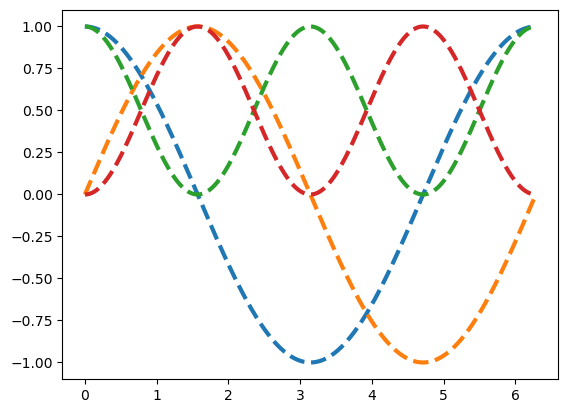

In [57]:
t = np.linspace(0,2*np.pi,1000)

y1 = np.cos(t)
y2 = np.sin(t)
y3 = np.cos(t)**2
y4 = np.sin(t)**2

my_dict = {'linestyle':'dashed', 'linewidth':3}

plt.plot(t,y1, **my_dict)
plt.plot(t,y2, **my_dict)
plt.plot(t,y3, **my_dict)
plt.plot(t,y4, **my_dict)

## Regular expressions

The regular expressions package, `re`, is a powerful tool for processing text data.

In [75]:
import re

We've seen how to use the `.replace` function to replace some text with new text:

In [79]:
s = "This string doesn't use contractions. The last sentence wasn't a lie."

In [80]:
s.replace("doesn't", 'does not')

"This string does not use contractions. The last sentence wasn't a lie."

In the above example, we explicitly replaced the string `doesn't` with `does not`.

Very often, we may want to make more flexible replacements. The `re` package gives us this flexibility. Some of the key functions that we will use are:
 - `re.findall`: this is used to find substrings that match a given pattern
 - `re.sub`: this used to replace substrings with desired text

In [83]:
help(re.findall)

Help on function findall in module re:

findall(pattern, string, flags=0)
    Return a list of all non-overlapping matches in the string.
    
    If one or more capturing groups are present in the pattern, return
    a list of groups; this will be a list of tuples if the pattern
    has more than one group.
    
    Empty matches are included in the result.



In [93]:
s = 'This is a test string. Lalalala. Happy Monday! Tis the season.'

In [94]:
re.findall('la', s)

['la', 'la', 'la']

The patterns that we use for regular expressions can be much more general than just explicit strings. For example,
 - `\w` can be used to represent any word character
 - `\d` can be used to represent any digit character
 - `\s` can be used to represent any white space character
 - `\b` can be used to represent the boundary of a word (either the start or the end)

In [95]:
re.findall('\w\ws\s', s)

['his ', 'Tis ']

Last time, I downloaded the text of Frankenstein. Let's read it in and explore it with regular expressions:

In [96]:
with open('frankenstein.txt',encoding='utf-8') as f:
    text = f.read()

Let's find all four letter words that end with `s`:

In [1]:
#re.findall('\s\w\w\ws\s', text)

Rather than using `\s` to signify a space before or after our words, we can also use `\b` to designate a "boundary character", which is a letter character that is adjacent to white space (or puncutation).

In [106]:
set(re.findall(r'\b\w\w\w\w\w\w\ws\b', text))

{'Albertus',
 'Asiatics',
 'Darkness',
 'Generous',
 'Grecians',
 'Idleness',
 'Italians',
 'Lycurgus',
 'Phillips',
 'Pitiless',
 'Sections',
 '_Sorrows',
 'accounts',
 'agitates',
 'analysis',
 'arbiters',
 'arteries',
 'articles',
 'attempts',
 'attracts',
 'auguries',
 'barriers',
 'beauties',
 'believes',
 'benefits',
 'blankets',
 'brambles',
 'branches',
 'breakers',
 'brothers',
 'business',
 'cabinets',
 'calmness',
 'caprices',
 'careless',
 'caresses',
 'chemists',
 'chimeras',
 'coldness',
 'colleges',
 'composes',
 'comrades',
 'condemns',
 'confines',
 'confirms',
 'consoles',
 'consumes',
 'contents',
 'coolness',
 'cottages',
 'creators',
 'crevices',
 'darkness',
 'delights',
 'deprives',
 'descends',
 'desirous',
 'detracts',
 'dialects',
 'displays',
 'distress',
 'disturbs',
 'dungeons',
 'editions',
 'elements',
 'elevates',
 'emotions',
 'energies',
 'environs',
 'epithets',
 'expenses',
 'extremes',
 'eyeballs',
 'families',
 'fatigues',
 'fearless',
 'features',

Instead of manually typing in 8 different `\w` word characters, we can write `\w{8}` to denote 8 `\w` characters.

In [117]:
set(re.findall(r'\b\w{14}s\b', text))

{'accomplishments',
 'classifications',
 'considerateness',
 'disappointments',
 'impossibilities',
 'inquisitiveness',
 'representations'}

In [125]:
s = 'Today is 4/14/2025. Tomorrow is 4/15/2025. The time is 4:43PM. In eight hours, it will be 12:43AM.' 

In [119]:
re.findall('\d{,2}/\d{,2}/\d{4}', s)

['4/14/2025', '4/15/2025']

We can use square brackets to specify a collection of valid characters to match:

In [128]:
re.findall('\d{,2}:\d{2}[AP]M', s)

['4:43PM', '12:43AM']

Suppose we want to replace dates that are in the format `mm/dd/YYY` with a new format, `mm - dd - YYYY`.

In [132]:
help(re.sub)

Help on function sub in module re:

sub(pattern, repl, string, count=0, flags=0)
    Return the string obtained by replacing the leftmost
    non-overlapping occurrences of the pattern in string by the
    replacement repl.  repl can be either a string or a callable;
    if a string, backslash escapes in it are processed.  If it is
    a callable, it's passed the Match object and must return
    a replacement string to be used.



In [136]:
def reformat_date(date):
    return date.group(0).replace('/', ' - ')

In [137]:
re.sub('\d{,2}/\d{,2}/\d{4}', reformat_date, s)

'Today is 4 - 14 - 2025. Tomorrow is 4 - 15 - 2025. The time is 4:43PM. In eight hours, it will be 12:43AM.'

# Wednesday, April 16th

Last time, we starting looking at using the Regular Expressions package (`re`) to process text data.

In [1]:
import re

In [2]:
s = 'This is a sample string. It has some numbers: 1, 2, 100, 5000.'

Suppose we want to find any numbers that are in the string `s`.

We would like to find as many adjacent digit characters as possible. We can use `\d` for a digit character along with the quantifier `+` to seek as many digit characters as possible.

In [6]:
pattern = '\d'

matches = re.findall(pattern, s)
print(s)
print(matches)

This is a sample string. It has some numbers: 1, 2, 100, 5000.
['1', '2', '1', '0', '0', '5', '0', '0', '0']


In [7]:
pattern = '\d+'

matches = re.findall(pattern, s)
print(s)
print(matches)

This is a sample string. It has some numbers: 1, 2, 100, 5000.
['1', '2', '100', '5000']


We can also create groups of acceptable characters for matching by using square brackets `[]`.

Let's try to find any word that has only lowercase letters.

**Warning**: Whenever we constructs patterns for use with regular expressions, it is advisable to use "raw" strings. Python won't do any special interpretation of characters in raw strings. We can define a raw string by prepending the quotes with an `r`:

In [19]:
pattern = r'\b[abcdefghijklmnopqrstuvwxyz]+\b'

matches = re.findall(pattern, s)
print(s)
print(matches)

This is a sample string. It has some numbers: 1, 2, 100, 5000.
['is', 'a', 'sample', 'string', 'has', 'some', 'numbers']


Note: We can use hyphens to designate a range of letters:

In [22]:
pattern = r'\b[a-z]+\b'

matches = re.findall(pattern, s)
print(s)
print(matches)

This is a sample string. It has some numbers: 1, 2, 100, 5000.
['is', 'a', 'sample', 'string', 'has', 'some', 'numbers']


In [24]:
s = 'This is a sample string. It has some numbers: 1, 2, 100, 5000. NOW I AM YELLING!'

pattern = r'\b[A-Z]+\b'

matches = re.findall(pattern, s)
print(s)
print(matches)

This is a sample string. It has some numbers: 1, 2, 100, 5000. NOW I AM YELLING!
['NOW', 'I', 'AM', 'YELLING']


In [26]:
s = 'This is a sample string. It has some numbers: 1, 2, 100, 5000. NOW I AM YELLING!'

pattern = r'\b[A-m]+\b'

matches = re.findall(pattern, s)
print(s)
print(matches)

This is a sample string. It has some numbers: 1, 2, 100, 5000. NOW I AM YELLING!
['a', 'NOW', 'I', 'AM', 'YELLING']


Let's find all words that start with a capital letter and are otherwise lowercase:

In [27]:
s = 'This is a sample string. It has some numbers: 1, 2, 100, 5000. NOW I AM YELLING!'

pattern = r'\b[A-Z][a-z]*\b'

matches = re.findall(pattern, s)
print(s)
print(matches)

This is a sample string. It has some numbers: 1, 2, 100, 5000. NOW I AM YELLING!
['This', 'It', 'I']


Let's get some more "interesting" text data to work with. We'll use the `requests` package to download information from the Math Department's webpage.

## Requests

In [28]:
import requests

In [30]:
help(requests.get)

Help on function get in module requests.api:

get(url, params=None, **kwargs)
    Sends a GET request.
    
    :param url: URL for the new :class:`Request` object.
    :param params: (optional) Dictionary, list of tuples or bytes to send
        in the query string for the :class:`Request`.
    :param \*\*kwargs: Optional arguments that ``request`` takes.
    :return: :class:`Response <Response>` object
    :rtype: requests.Response



In [31]:
url = 'https://www.buffalo.edu/cas/math/people/faculty.html'
webpage = requests.get(url)

We can use the `.text` attribute on the object returned by `requests.get` to get the text:

In [39]:
text = webpage.text

text = text.replace('>','>\n')

To make the text a little more readable, let's replace any `>` with `>\n`:

In [122]:
#print(text)

Can we find my name somewhere in this HTML code?

In [35]:
pattern = r'Jonathan Lottes'

re.findall(pattern, text)

['Jonathan Lottes',
 'Jonathan Lottes',
 'Jonathan Lottes',
 'Jonathan Lottes',
 'Jonathan Lottes',
 'Jonathan Lottes',
 'Jonathan Lottes',
 'Jonathan Lottes']

Looking through the HTML code, it looks like we can identify faculty members based on the following:

`<a aria-label="Faculty:FACULTY MEMBER"`

In [45]:
pattern = r'<a aria-label="Faculty:[A-z ]+"'

matches = re.findall(pattern, text)

for match in matches[:10]:
    print(match)

<a aria-label="Faculty:Bernard Badzioch"
<a aria-label="Faculty:Maxim Bichuch"
<a aria-label="Faculty:Gino Biondini"
<a aria-label="Faculty:Robert Busch"
<a aria-label="Faculty:Michael Casper"
<a aria-label="Faculty:Alexandr Chernyavski"
<a aria-label="Faculty:Alexandru Chirvasitu"
<a aria-label="Faculty:Ching Chou"
<a aria-label="Faculty:Thomas Cusick"
<a aria-label="Faculty:Jintao Deng"


## Matching with groups

Note: Our pattern for identification included extra text that we don't actually want. We just the names. We can use parentheses `()` inside our pattern to denote match groups.

In [46]:
s = 'My name is Jon Lottes. I am 35 years old.'

In [48]:
pattern = r'My name is ([A-z ]+)'

re.findall(pattern, s)

['Jon Lottes']

In [50]:
pattern = r'I am (\d+ years) old'

re.findall(pattern, s)

['35 years']

In [51]:
pattern = r'<a aria-label="Faculty:([A-z ]+)"'

matches = re.findall(pattern, text)

for match in matches[:10]:
    print(match)

Bernard Badzioch
Maxim Bichuch
Gino Biondini
Robert Busch
Michael Casper
Alexandr Chernyavski
Alexandru Chirvasitu
Ching Chou
Thomas Cusick
Jintao Deng


Can we find phone numbers?

It looks like my information is contained in a block of HTML code. Can we use regular expressions to identify these blocks?

It looks like `<div class="clearfix">` comes after each block of information, and `<div class="profileinfo-teaser teaser-block">` comes before each block.

We want to match any number of any characters between these starting and ending strings. One way to do this is to use opposites in square brackets, e.g. `[\w\W]*`.

In [52]:
block_start = r'<div class="profileinfo-teaser teaser-block">'
block_end = r'<div class="clearfix">'

pattern = block_start + r'[\w\W]*' + block_end

matches = re.findall(pattern, text)

In [54]:
len(matches)

1

Note: By default, regular expressions will search for the largest possible match.

In [55]:
s = 'This is a test! Hello to you! Goodbye!'

In [59]:
# Let's find characters that end in exclamation points.

pattern = r'[\w\W]+!'

re.findall(pattern, s)

['This is a test! Hello to you! Goodbye!']

If we want to stop each match as soon as there's a match, we can use a question mark following the `+` quantifier (and similar for `*`).

In [60]:
pattern = r'[\w\W]+?!'

re.findall(pattern, s)

['This is a test!', ' Hello to you!', ' Goodbye!']

For the HTML information blocks, we want to stop as soon as we find a suitable match.

In [61]:
block_start = r'<div class="profileinfo-teaser teaser-block">'
block_end = r'<div class="clearfix">'

pattern = block_start + r'[\w\W]*?' + block_end

matches = re.findall(pattern, text)

In [62]:
len(matches)

52

Let's try to pick out name information, phone number information, and email address information from each block.

In [123]:
match = matches[22]
#print(match)

In [111]:
name_pattern = r'alt="([\w ,\._]+)\. "'
name = re.findall(name_pattern,match)[0]
print(name)

Jonathan Lottes


In [112]:
email_pattern = r'[\w\d\.]+@[\w\d]+\.[\w\d]+'
email = re.findall(email_pattern, match)[0]
print(email)

jllottes@buffalo.edu


In [117]:
phone_pattern = r'Phone: (\(\d{3}\) \d{3}-\d{,4})'
phone = re.findall(phone_pattern, match)[0]
print(phone)

(716) 645-8775


Now we can iterate through each block and pull out the name, email, and phone.

In [118]:
block_start = r'<div class="profileinfo-teaser teaser-block">'
block_end = r'<div class="clearfix">'

pattern = block_start + r'[\w\W]*?' + block_end

faculty_blocks = re.findall(pattern, text)

names = []
phones = []
emails = []

for faculty_block in faculty_blocks:
    name = re.findall(name_pattern,faculty_block)[0]
    email = re.findall(email_pattern, faculty_block)[0]
    phone = re.findall(phone_pattern, faculty_block)[0]
    
    names.append(name)
    phones.append(phone)
    emails.append(email)

In [120]:
for name, phone, email in zip(names, phones, emails):
    print(name)
    print(phone)
    print(email)
    print()

Daniel Sage
(716) 645-8781
dsage@buffalo.edu

James Faran
(716) 645-8776
jjfaran@buffalo.edu

Johanna Mangahas
(716) 645-8767
mangahas@buffalo.edu

Naoki Masuda
(716) 645-8804
naokimas@buffalo.edu

Bernard Badzioch
(716) 645-8798
badzioch@buffalo.edu

Maxim Bichuch, PhD
(716) 645-8803
mbichuch@buffalo.edu

Gino Biondini
(716) 645-8810
biondini@buffalo.edu

Robert Busch
(716) 645-8760
rlbusch@buffalo.edu

Michael Casper
(716) 645-8779
mjcasper@buffalo.edu

Alexandr Chernyavskiy
(716) 645-8814
chernyav@buffalo.edu

Alexandru Chirvasitu
(716) 645-8831
achirvas@buffalo.edu

Ching Chou
(716) 645-8806
chouc@buffalo.edu

Thomas Cusick
(716) 645-8801
cusick@buffalo.edu

Jintao Deng
(716) 645-6284
jintaode@buffalo.edu

Sergey Dyachenko, PhD
(716) 645-8797
sergeydy@buffalo.edu

James Faran
(716) 645-8776
jjfaran@buffalo.edu

Daniel Gendin
(716) 645-8808
dgendin@buffalo.edu

Daozhi Han
(716) 645-8789
daozhiha@buffalo.edu

Tara Hudson, PhD
(716) 645-8769
tarahuds@buffalo.edu

Joseph Hundley
(716) 

It looks like we need to revisit our name matching pattern to make some adjustments. It's based on the picture included for each faculty member, but not every member has a picture.